In [2]:
import networkx as nx
import random

# British Columbia Simulation Parameters
num_nodes = 500000  # Assume 5000 individuals in the simulation
num_communities = 5  # 5 regions representing major BC cities

# City-specific parameters
community_sizes = [num_nodes // num_communities] * num_communities
community_graphs = [nx.barabasi_albert_graph(size, 4) for size in community_sizes]  # 4 connections per person

# Combine regions into a single graph with inter-regional connections
G = nx.Graph()
offset = 0
for idx, community in enumerate(community_graphs):
    # Renumber nodes to prevent conflicts
    mapping = {node: node + offset for node in community.nodes}
    community = nx.relabel_nodes(community, mapping)
    G = nx.compose(G, community)
    offset += community.number_of_nodes()

    # Inter-region connections
    if idx < num_communities - 1:
        for _ in range(50):  # Randomly connect 50 edges between regions
            node_a = random.choice(list(community.nodes))
            node_b = random.choice(list(community_graphs[idx + 1].nodes)) + offset
            G.add_edge(node_a, node_b)

# Initialize Infection Status
status = {node: 'S' for node in G.nodes}
initial_infected = random.sample(list(G.nodes), 20)  # Initial infections
for node in initial_infected:
    status[node] = 'E'

# COVID-19 Simulation Parameters
infection_rate = 0.15  # Initial infection rate
recovery_rate = 0.9
mortality_rate = 0.01
incubation_period = 5  # Days before symptoms
mutation_weeks = [48,96]  # Weeks when virus mutates

# Weekly Reporting
weekly_data = {'new_cases': [], 'cumulative_cases': [], 'deaths': []}
exposed_duration = {node: 0 for node in G.nodes}
cumulative_cases = len(initial_infected)

def simulate_week(status, exposed_duration):
    global infection_rate, cumulative_cases
    new_cases = 0
    deaths = 0

    for _ in range(7):  # Simulate 7 days per week
        new_status = status.copy()

        for node in G.nodes:
            if status[node] == 'E':
                exposed_duration[node] += 1
                if exposed_duration[node] >= incubation_period:
                    new_status[node] = 'I'
                    new_cases += 1

            elif status[node] == 'I':
                # Infect neighbors
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < infection_rate:
                        new_status[neighbor] = 'E'

                # Death or Recovery
                if random.random() < mortality_rate:
                    new_status[node] = 'D'
                    deaths += 1
                elif random.random() < recovery_rate:
                    new_status[node] = 'R'

        status = new_status

    # Mutation Effect
    current_week = len(weekly_data['new_cases'])
    if current_week in mutation_weeks:
        infection_rate *= 1.2  # Increase infection rate by 20% for mutations

    cumulative_cases += new_cases
    weekly_data['new_cases'].append(new_cases)
    weekly_data['cumulative_cases'].append(cumulative_cases)
    weekly_data['deaths'].append(deaths)

    return status

# Simulate over 12 weeks
weeks = 200
status_history = [status]
for week in range(weeks):
    status = simulate_week(status, exposed_duration)
    status_history.append(status)

# Print Weekly Report
print("Weekly Report:")
for week in range(weeks):
    print(f"Week {week + 1}: New Cases = {weekly_data['new_cases'][week]}, "
          f"Cumulative Cases = {weekly_data['cumulative_cases'][week]}, "
          f"Deaths = {weekly_data['deaths'][week]}")


Weekly Report:
Week 1: New Cases = 20, Cumulative Cases = 40, Deaths = 1
Week 2: New Cases = 19, Cumulative Cases = 59, Deaths = 0
Week 3: New Cases = 99, Cumulative Cases = 158, Deaths = 0
Week 4: New Cases = 401, Cumulative Cases = 559, Deaths = 4
Week 5: New Cases = 7546, Cumulative Cases = 8105, Deaths = 21
Week 6: New Cases = 15920, Cumulative Cases = 24025, Deaths = 197
Week 7: New Cases = 29498, Cumulative Cases = 53523, Deaths = 313
Week 8: New Cases = 41676, Cumulative Cases = 95199, Deaths = 459
Week 9: New Cases = 45936, Cumulative Cases = 141135, Deaths = 534
Week 10: New Cases = 40214, Cumulative Cases = 181349, Deaths = 454
Week 11: New Cases = 38897, Cumulative Cases = 220246, Deaths = 304
Week 12: New Cases = 14529, Cumulative Cases = 234775, Deaths = 223
Week 13: New Cases = 5658, Cumulative Cases = 240433, Deaths = 92
Week 14: New Cases = 2514, Cumulative Cases = 242947, Deaths = 35
Week 15: New Cases = 1183, Cumulative Cases = 244130, Deaths = 20
Week 16: New Cases =

# Similar code, that generate line graph

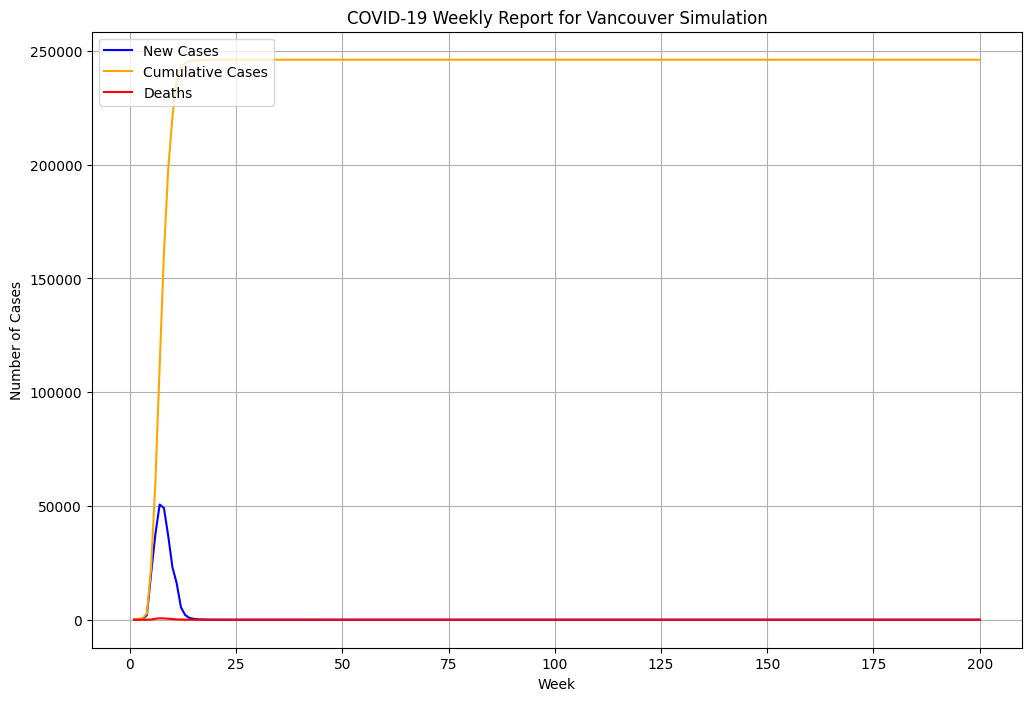

In [3]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Vancouver Simulation Parameters
num_nodes = 500000  # Simulate 500,000 individuals in Vancouver
num_communities = 5  # Representing major neighborhoods in Vancouver

# Neighborhood-specific parameters (assuming neighborhoods like Downtown, Kitsilano, etc.)
community_sizes = [num_nodes // num_communities] * num_communities
community_graphs = [nx.barabasi_albert_graph(size, 4) for size in community_sizes]  # 4 connections per person

# Combine neighborhoods into a single graph with inter-neighborhood connections
G = nx.Graph()
offset = 0
for idx, community in enumerate(community_graphs):
    # Renumber nodes to prevent conflicts
    mapping = {node: node + offset for node in community.nodes}
    community = nx.relabel_nodes(community, mapping)
    G = nx.compose(G, community)
    offset += community.number_of_nodes()

    # Inter-neighborhood connections
    if idx < num_communities - 1:
        for _ in range(200):  # Increase connections for more realistic city spread
            node_a = random.choice(list(community.nodes))
            node_b = random.choice(list(community_graphs[idx + 1].nodes)) + offset
            G.add_edge(node_a, node_b)

# Initialize Infection Status
status = {node: 'S' for node in G.nodes}
initial_infected = random.sample(list(G.nodes), 100)  # Initial infections in a large city
for node in initial_infected:
    status[node] = 'E'

# COVID-19 Simulation Parameters·
infection_rate = 0.15  # Initial infection rate
recovery_rate = 0.9
mortality_rate = 0.01
incubation_period = 5  # Days before symptoms
mutation_weeks = [48, 96]  # Weeks when virus mutates

# Weekly Reporting Data Storage
weekly_data = {'new_cases': [], 'cumulative_cases': [], 'deaths': []}
exposed_duration = {node: 0 for node in G.nodes}
cumulative_cases = len(initial_infected)

def simulate_week(status, exposed_duration):
    global infection_rate, cumulative_cases
    new_cases = 0
    deaths = 0

    for _ in range(7):  # Simulate 7 days per week
        new_status = status.copy()

        for node in G.nodes:
            if status[node] == 'E':
                exposed_duration[node] += 1
                if exposed_duration[node] >= incubation_period:
                    new_status[node] = 'I'
                    new_cases += 1

            elif status[node] == 'I':
                # Infect neighbors
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < infection_rate:
                        new_status[neighbor] = 'E'

                # Death or Recovery
                if random.random() < mortality_rate:
                    new_status[node] = 'D'
                    deaths += 1
                elif random.random() < recovery_rate:
                    new_status[node] = 'R'

        status = new_status

    # Mutation Effect
    current_week = len(weekly_data['new_cases'])
    if current_week in mutation_weeks:
        infection_rate *= 1.2  # Increase infection rate by 20% for mutations

    cumulative_cases += new_cases
    weekly_data['new_cases'].append(new_cases)
    weekly_data['cumulative_cases'].append(cumulative_cases)
    weekly_data['deaths'].append(deaths)

    return status

# Simulate over 200 weeks
weeks = 200
status_history = [status]
for week in range(weeks):
    status = simulate_week(status, exposed_duration)
    status_history.append(status)

# Visualization
weeks_range = range(1, weeks + 1)

# Plot New Cases
plt.figure(figsize=(12, 8))
plt.plot(weeks_range, weekly_data['new_cases'], label='New Cases', color='blue')
plt.plot(weeks_range, weekly_data['cumulative_cases'], label='Cumulative Cases', color='orange')
plt.plot(weeks_range, weekly_data['deaths'], label='Deaths', color='red')
plt.title('COVID-19 Weekly Report for Vancouver Simulation')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# simulate status graph

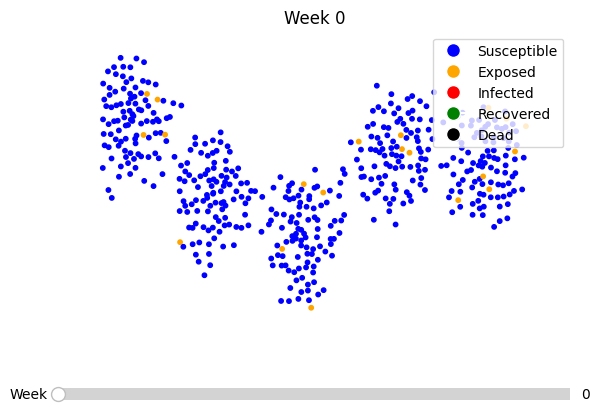

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pandas as pd

# British Columbia Simulation Parameters
num_nodes = 500  # Assume 500,000 individuals in the simulation
num_communities = 5  # 5 regions representing major BC cities

# City-specific parameters
community_sizes = [num_nodes // num_communities] * num_communities
community_graphs = [nx.barabasi_albert_graph(size, 4) for size in community_sizes]  # 4 connections per person

# Combine regions into a single graph with inter-regional connections
G = nx.Graph()
offset = 0
for idx, community in enumerate(community_graphs):
    # Renumber nodes to prevent conflicts
    mapping = {node: node + offset for node in community.nodes}
    community = nx.relabel_nodes(community, mapping)
    G = nx.compose(G, community)
    offset += community.number_of_nodes()

    # Inter-region connections
    if idx < num_communities - 1:
        for _ in range(50):  # Randomly connect 50 edges between regions
            node_a = random.choice(list(community.nodes))
            node_b = random.choice(list(community_graphs[idx + 1].nodes)) + offset
            G.add_edge(node_a, node_b)

# Initialize Infection Status
status = {node: 'S' for node in G.nodes}
initial_infected = random.sample(list(G.nodes), 20)  # Initial infections
for node in initial_infected:
    status[node] = 'E'

# COVID-19 Simulation Parameters
infection_rate = 0.15  # Initial infection rate
recovery_rate = 0.9
mortality_rate = 0.01
incubation_period = 5  # Days before symptoms
mutation_weeks = [48, 96]  # Weeks when virus mutates

# Weekly Reporting
weekly_data = {'new_cases': [], 'cumulative_cases': [], 'deaths': []}
exposed_duration = {node: 0 for node in G.nodes}
cumulative_cases = len(initial_infected)

def simulate_week(status, exposed_duration):
    global infection_rate, cumulative_cases
    new_cases = 0
    deaths = 0

    for _ in range(7):  # Simulate 7 days per week
        new_status = status.copy()

        for node in G.nodes:
            if status[node] == 'E':
                exposed_duration[node] += 1
                if exposed_duration[node] >= incubation_period:
                    new_status[node] = 'I'
                    new_cases += 1

            elif status[node] == 'I':
                # Infect neighbors
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < infection_rate:
                        new_status[neighbor] = 'E'

                # Death or Recovery
                if random.random() < mortality_rate:
                    new_status[node] = 'D'
                    deaths += 1
                elif random.random() < recovery_rate:
                    new_status[node] = 'R'

        status = new_status

    # Mutation Effect
    current_week = len(weekly_data['new_cases'])
    if current_week in mutation_weeks:
        infection_rate *= 1.2  # Increase infection rate by 20% for mutations

    cumulative_cases += new_cases
    weekly_data['new_cases'].append(new_cases)
    weekly_data['cumulative_cases'].append(cumulative_cases)
    weekly_data['deaths'].append(deaths)

    return status

# Simulate over 12 weeks
weeks = 200
status_history = [status]
for week in range(weeks):
    status = simulate_week(status, exposed_duration)
    status_history.append(status)

# Convert weekly data to DataFrame for better display
weekly_df = pd.DataFrame({
    'Week': list(range(1, weeks + 1)),
    'New Cases': weekly_data['new_cases'],
    'Cumulative Cases': weekly_data['cumulative_cases'],
    'Deaths': weekly_data['deaths']
})

# Print Weekly Report

# print("Weekly Report:")
# print(weekly_df.to_string(index=False))

# Visualization Setup
def update():
    step = int(slider.val)
    current_status = status_history[step]
    color_map = {'S': 'blue', 'E': 'orange', 'I': 'red', 'R': 'green', 'D': 'black'}
    node_colors = [color_map[current_status[node]] for node in G.nodes]

    ax.clear()
    nx.draw(G, node_color=node_colors, with_labels=False,node_size=10, ax=ax,edge_color='none')
    ax.set_title(f"Week {step}")

    # Adding a legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Susceptible'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Exposed'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Infected'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Recovered'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Dead')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

# Set up the figure and axis
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.25)

# Create the slider
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.05], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Week', 0, weeks, valinit=0, valstep=1)

# Update the plot when the slider value changes
slider.on_changed(update)

# Initial plot
update(val=0)

# Display the plot
plt.show()


# Graph is created based on the population of communities of vancouver

*   input: A specific day during the pandemic.
*   output: the map of vancouver communities colored according to the accumulative cases of the assigned day




In [5]:
import networkx as nx
import random
import pandas as pd
import folium
import geopandas as gpd
import branca

# Community sizes based on the provided population data
location_population_density = [
    {"name": "Arbutus-Ridge", "population": 16121, "density": 3},
    {"name": "Downtown", "population": 65380, "density": 12},
    {"name": "Dunbar-Southlands", "population": 22582, "density": 2},
    {"name": "Fairview", "population": 35435, "density": 7},
    {"name": "Grandview-Woodland", "population": 30750, "density": 5},
    {"name": "Hastings-Sunrise", "population": 36442, "density": 3},
    {"name": "Kensington-Cedar Cottage", "population": 51989, "density": 5},
    {"name": "Kerrisdale", "population": 14730, "density": 2},
    {"name": "Killarney", "population": 30909, "density": 3},
    {"name": "Kitsilano", "population": 45369, "density": 6},
    {"name": "Marpole", "population": 24460, "density": 3},
    {"name": "Mount Pleasant", "population": 34735, "density": 6},
    {"name": "Oakridge", "population": 13734, "density": 2},
    {"name": "Renfrew-Collingwood", "population": 54313, "density": 5},
    {"name": "Riley Park", "population": 23773, "density": 3},
    {"name": "Shaughnessy", "population": 8885, "density": 1},
    {"name": "South Cambie", "population": 8400, "density": 3},
    {"name": "Strathcona", "population": 13265, "density": 2},
    {"name": "Sunset", "population": 38471, "density": 4},
    {"name": "Victoria-Fraserview", "population": 32743, "density": 4},
    {"name": "West End", "population": 49749, "density": 17},
    {"name": "West Point Grey", "population": 13771, "density": 2}
]

# Initialize a dictionary to store node-community mappings
node_community_map = {}

# Generate a Barabási-Albert graph for each community based on its population size
community_graphs = [nx.barabasi_albert_graph(each_community['population'], each_community['density']) for each_community in location_population_density]

# Combine regions into a single graph with inter-regional connections
G = nx.Graph()
offset = 0
num_communities = len(community_graphs)
community_names = [community['name'] for community in location_population_density]

for idx, community in enumerate(community_graphs):
    community_name = community_names[idx]

    # Renumber nodes to prevent conflicts
    mapping = {node: node + offset for node in community.nodes}
    community = nx.relabel_nodes(community, mapping)

    # Update node-community mapping with the current community name
    for node in community.nodes:
        node_community_map[node] = community_name

    # Add the current community graph to the main graph
    G = nx.compose(G, community)
    offset += community.number_of_nodes()

    # Inter-region connections
    if idx < num_communities - 1:
        for _ in range(50):  # Randomly connect 50 edges between regions
            node_a = random.choice(list(community.nodes))
            node_b = random.choice(list(community_graphs[idx + 1].nodes)) + offset
            G.add_edge(node_a, node_b)

# Now you have a node_community_map that stores the community name for each node

# Initialize Infection Status
status = {node: 'S' for node in G.nodes}
initial_infected = random.sample(list(G.nodes), 20)  # Initial infections
for node in initial_infected:
    status[node] = 'E'

# COVID-19 Simulation Parameters
infection_rate = 0.15  # Initial infection rate
recovery_rate = 0.9
mortality_rate = 0.01
incubation_period = 5  # Days before symptoms
mutation_days = [336, 672]  # Days when virus mutates

# Daily Reporting
cumulative_cases = len(initial_infected)
exposed_duration = {node: 0 for node in G.nodes}
community_data = {name: {'cumulative_cases': 0} for name in community_names}

def simulate_day(status, exposed_duration):
    global infection_rate, cumulative_cases
    new_cases = 0

    # Temporary storage for today's cases by community
    community_daily_cases = {name: 0 for name in community_names}

    new_status = status.copy()

    for node in G.nodes:
        community_name = node_community_map[node]  # Get the community name for the current node

        if status[node] == 'E':
            exposed_duration[node] += 1
            if exposed_duration[node] >= incubation_period:
                new_status[node] = 'I'
                new_cases += 1
                community_daily_cases[community_name] += 1

        elif status[node] == 'I':
            # Infect neighbors
            for neighbor in G.neighbors(node):
                if status[neighbor] == 'S' and random.random() < infection_rate:
                    new_status[neighbor] = 'E'

            # Death or Recovery
            if random.random() < mortality_rate:
                new_status[node] = 'D'
            elif random.random() < recovery_rate:
                new_status[node] = 'R'

    # Update community-level cumulative cases
    for name in community_names:
        community_data[name]['cumulative_cases'] += community_daily_cases[name]

    # Mutation Effect
    current_day = len(exposed_duration)
    if current_day in mutation_days:
        infection_rate *= 1.2  # Increase infection rate by 20% for mutations

    cumulative_cases += new_cases

    return new_status

# Function to simulate up to a specified day
def simulate_until_day(target_day):
    global status
    for day in range(1, target_day + 1):
        status = simulate_day(status, exposed_duration)

    # Create a DataFrame with cumulative cases per community
    data = {
        'Community': [name for name in community_names],
        'Cumulative Cases': [community_data[name]['cumulative_cases'] for name in community_names]
    }
    df = pd.DataFrame(data)
    return df

# Example usage: Simulate until day 100 and get the report
day = 100  # Specify the day you want the report for
result_df = simulate_until_day(day)
print(f"COVID-19 Cumulative Report for Day {day}:\n")
print(result_df.to_string(index=False))

# transform dataframe to dictionary
cases_data = result_df.set_index('Community')['Cumulative Cases'].to_dict()

# import GeoJSON data
geojson_file = '../data/local-area-boundary.geojson'  # the path of geo file
gdf = gpd.read_file(geojson_file)

# create map
m = folium.Map(location=[49.26454048616976, -123.1310488653851], zoom_start=12)

# add headline of map
title_html = f'''
    <h3 align="center" style="font-size:20px"><b>COVID-19 accumulative cases - day {day} </b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

# create color mapping, use the scope of accumulative cases
vmin = min(cases_data.values()) if cases_data else 0
vmax = max(cases_data.values()) if cases_data else 1
colormap = branca.colormap.LinearColormap(
    ['pink', 'red', 'purple'], vmin=vmin, vmax=vmax
).to_step(n=10)

# iterate GeoJSON data and add color to every region
for _, row in gdf.iterrows():
    # get geometry data of every region
    geom = row['geometry']
    region_name = row['name']  #  GeoJSON has "name" field to represent name of region

    # get the cases of this region
    cases = cases_data.get(region_name, 0)

    # set the filling color according to the number of cases
    color = colormap(cases)

    # add polygons
    folium.GeoJson(
        geom,
        style_function=lambda x, color=color: {
            'fillColor': color,  # filling
            'color': 'black',  # frame color
            'weight': 2,  # weidth
            'fillOpacity': 0.6  # transparency
        },
        tooltip=f"{region_name}: {cases}"  # the text of the mouse hovering
    ).add_to(m)

# add color legend
m.add_child(colormap)

# save map as HTML
m.save('map_with_cases.html')

# remind the user
print("the map has been saved as map_with_cases.html, open in a browser")


COVID-19 Cumulative Report for Day 100:

               Community  Cumulative Cases
           Arbutus-Ridge              3163
                Downtown             61491
       Dunbar-Southlands                11
                Fairview              8821
      Grandview-Woodland             18320
        Hastings-Sunrise                43
Kensington-Cedar Cottage             32357
              Kerrisdale                 7
               Killarney                 1
               Kitsilano                 1
                 Marpole                 2
          Mount Pleasant                 0
                Oakridge                 7
     Renfrew-Collingwood             33696
              Riley Park                 4
             Shaughnessy                 0
            South Cambie                 0
              Strathcona                 0
                  Sunset                10
     Victoria-Fraserview                 2
                West End                 0
         West